# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Ras-interactions" data-toc-modified-id="Ras-interactions-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Ras interactions</a></div><div class="lev1 toc-item"><a href="#Wnt-Interactions" data-toc-modified-id="Wnt-Interactions-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Wnt Interactions</a></div><div class="lev1 toc-item"><a href="#PCA" data-toc-modified-id="PCA-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>PCA</a></div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import epistasis as epi
import sklearn.decomposition


from matplotlib import rc

import os
rc('text', usetex=True)
rc('text.latex', preamble=r'\usepackage{cmbright}')
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Helvetica']})


%matplotlib inline

# This enables SVG graphics inline. 
%config InlineBackend.figure_formats = {'png', 'retina'}

# JB's favorite Seaborn settings for notebooks
rc = {'lines.linewidth': 2, 
      'axes.labelsize': 18, 
      'axes.titlesize': 18, 
      'axes.facecolor': 'DFDFE5'}
sns.set_context('notebook', rc=rc)
sns.set_style("dark")

mpl.rcParams['xtick.labelsize'] = 16 
mpl.rcParams['ytick.labelsize'] = 16 
mpl.rcParams['legend.fontsize'] = 14

In [2]:
strains =['ps4187', 'ps4087', 'ps4176', 'ew15', 'mt21245', 'mt4866','n2731', 'n2376', 'n767', 'n2731-n767', 'tm1489',
          'n3809', 'n3917', 'n745', 'n767-tm1489', 'n2731-tm1489',
          'ia4', 'ok1402', 'ok161', 'sa307', 'sa307-ok161', 'sa307-ia4',
          'q71']

strain_dict = {}
for i, g in enumerate(strains):
    strain_dict[g] = i

In [3]:
q = 0.1

In [4]:
genmap = pd.read_csv('../sleuth/rna_seq_info.txt', sep=' ', comment='#')
tidy  = pd.read_csv('../input/quantifications.csv')

In [5]:
stress = epi.find_overlap(['sa307', 'sa307-ok161'], tidy)
tidy = tidy[(tidy.strain.isin(['mt21245', 'mt4866', 'ps4187', 'ps4087', 'ps4176', 'ew15'])) & (~tidy.target_id.isin(stress))]

# Ras interactions

In [6]:
ras = epi.find_overlap(['mt21245', 'mt4866'], tidy)

lf = tidy[(tidy.strain == 'mt21245') & (tidy.target_id.isin(ras))].copy()
gf = tidy[(tidy.strain == 'mt4866') & (tidy.target_id.isin(ras))].copy()

lf['standardized_b'] = lf.b.values/gf.b.values
ras_ac = lf[lf.standardized_b < 0].target_id.values
print(len(ras_ac))

32


In [7]:
overlap = epi.find_overlap(['ps4087', 'mt21245', 'ps4176'], tidy)

In [8]:
len(overlap)

366

In [9]:
tidy[tidy.target_id.isin(overlap)].ext_gene.unique()

array(['mex-6', 'B0041.8', 'B0218.7', 'B0273.1', 'nhr-10', 'lin-8',
       'B0511.11', 'B0513.4', 'C01B10.3', 'C01G10.1', 'C01G6.3', 'acs-7',
       'tag-52', 'lmp-1', 'rnr-2', 'C03C11.1', 'ugt-63', 'C05C12.5',
       'C05D12.3', 'C06A8.6', 'C06A8.8', 'spr-3', 'C07A9.9', 'tol-1',
       'ugt-64', 'C08A9.6', 'zyg-11', 'vgln-1', 'C09B8.5', 'C09D4.3',
       'sox-4', 'pptr-2', 'C14C6.2', 'C17E4.2', 'C17E7.4', 'C17H12.12',
       'C18B2.4', 'die-1', 'C18G1.9', 'C18H2.1', 'C23G10.6', 'C23H3.9',
       'C24A11.1', 'flh-2', 'C27A12.6', 'egrh-1', 'C28A5.6', 'C28C12.4',
       'C28D4.4', 'C28H8.3', 'C31G12.1', 'C33A12.19', 'C33E10.4',
       'C33F10.11', 'C33F10.12', 'rsp-6', 'C34D4.2', 'ampd-1', 'C35A5.4',
       'C35E7.10', 'C35E7.5', 'C35E7.9', 'C36B1.14', 'acdh-5', 'C38C10.3',
       'cmt-1', 'C41H7.3', 'sdz-6', 'perm-4', 'eor-2', 'C45G9.9',
       'C47F8.1', 'oac-9', 'nasp-2', 'C50C3.2', 'C50E3.12', 'C50F4.6',
       'C53A3.2', 'C53B7.2', 'mboa-3', 'C55C3.3', 'cav-2', 'C56E6.2',
       'ak

# Wnt Interactions

In [10]:
size = len(epi.find_overlap(['ps4187', 'ps4176'], tidy))/len(epi.find_overlap(['ps4087', 'ps4176'], tidy))
print('PS4187 is {0:.2g}% of PS4087'.format(size*100))

PS4187 is 21% of PS4087


In [11]:
wnt_strong = epi.find_overlap(['ps4087', 'ew15', 'ps4176'], tidy)

In [12]:
len(wnt_strong)

547

In [13]:
len(epi.find_overlap(['ew15'], tidy))

4213

In [14]:
wnt_weak = epi.find_overlap(['ps4187', 'ew15', 'ps4176'], tidy)

In [15]:
len(wnt_weak)

114

In [16]:
243/940

0.25851063829787235

In [17]:
len(tidy[tidy.strain.isin(['ew15', 'ps4087', 'ps4176']) & (tidy.qval < q)].target_id.unique())

5761

In [18]:
7646/len(tidy.target_id.unique())

0.40596793033874906

In [19]:
940/7656

0.12277951933124347

# PCA

In [20]:
strains = ['ps4087', 'ps4187', 'ps4176', 'mt21245', 'mt4866']
df = tidy[tidy.strain.isin(strains)].copy()

In [21]:
max_overlap = df[df.qval < q].target_id.unique()
print('There are {0} isoforms that are DE in at least one genotype in this analysis'.format(len(max_overlap)))

grouped = df.groupby('strain')
bvals = np.array([])
labels = []
for code, group in grouped:
    # find names:
    names = group.target_id.isin(max_overlap)
    # extract (b, q) for each gene
    bs = group[names].b.values
    qs = group[names].qval.values
    
    # find sig genes:
    inds = np.where(qs > q)
    # set non-sig b values to 0
    bs[inds] = 0
    #standardize bs
    bs = (bs - bs.mean())/(bs.std())
    
    # place in array
    if len(bvals) == 0:
        bvals = bs
    else:
        bvals = np.vstack((bvals, bs))
    # make a label array
    labels +=  [code]

There are 4861 isoforms that are DE in at least one genotype in this analysis


Fraction of variance explained
 [  3.11925256e-01   2.88384898e-01   2.23239161e-01   1.76450684e-01
   2.17970886e-30]


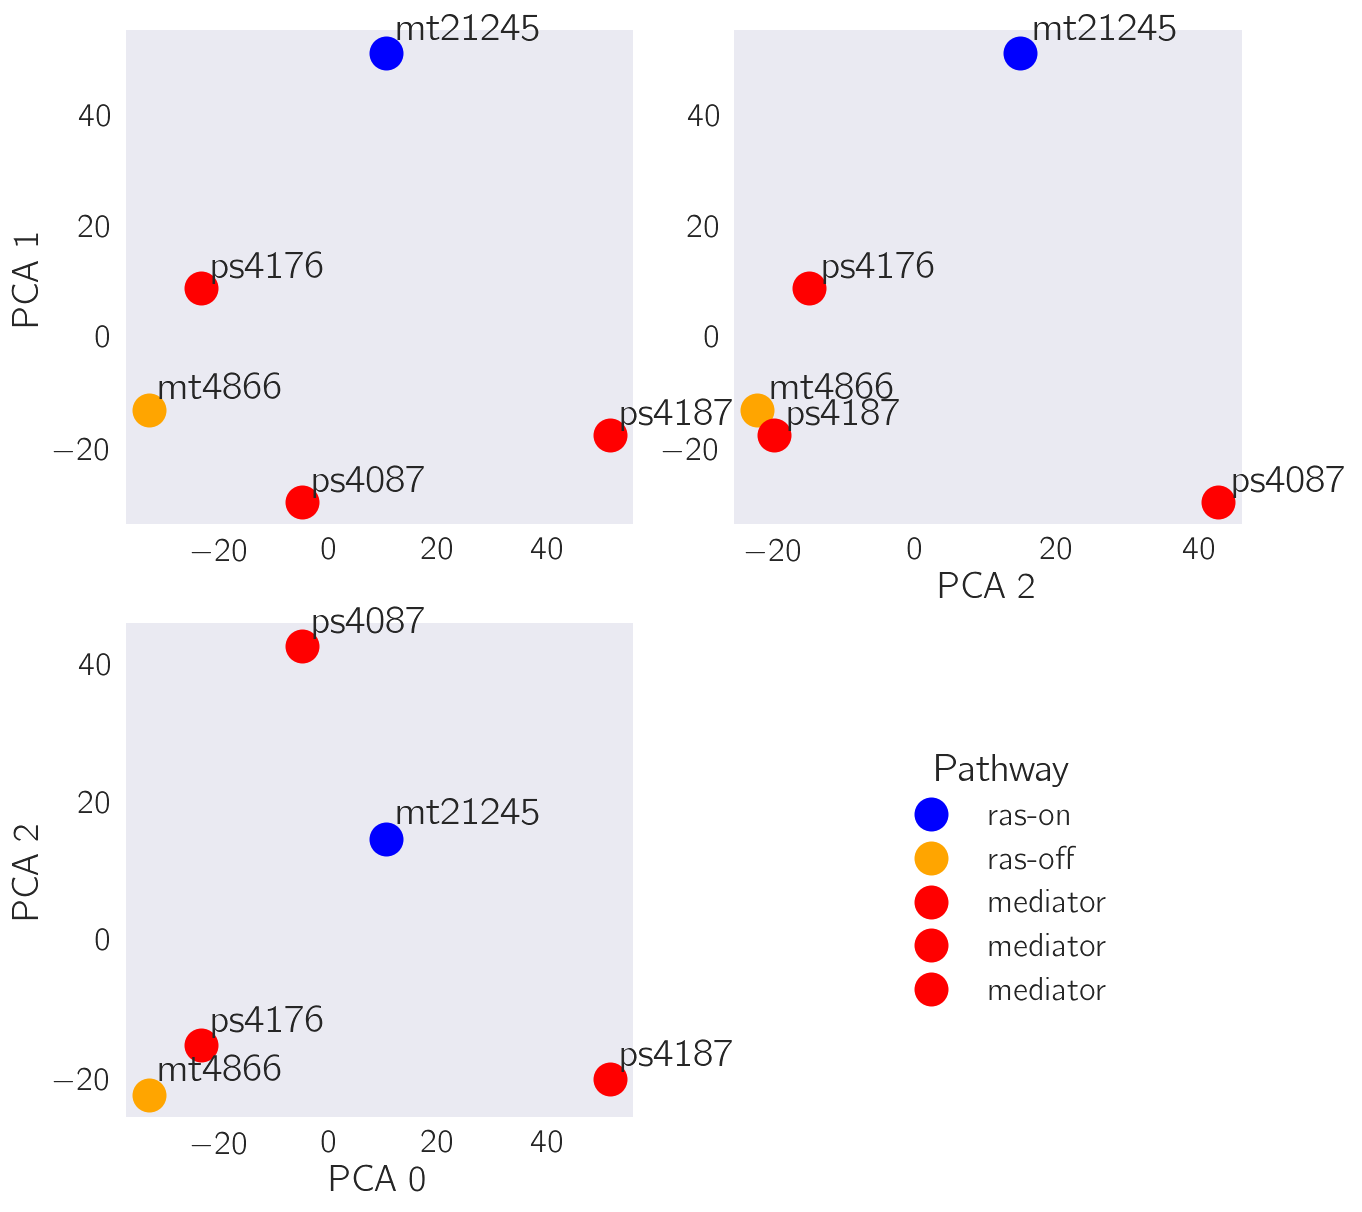

In [22]:
# initialize the PCA object and fit to the b-values
sklearn_pca = sklearn.decomposition.PCA(n_components=5).fit(bvals)
coords = sklearn_pca.fit(bvals).transform(bvals)
print('Fraction of variance explained\n', sklearn_pca.explained_variance_ratio_)

color = {'ras_on': 'blue', 'ras_off': 'orange', 'mediator': 'red', 'wnt': 'green'}
shapes = ['D', 'D', 'v', '8', 'D', 'v', 'o']

# go through each pair of points and plot them:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(10, 10))
for i, array in enumerate(coords):
    pathway = genmap[genmap.strain == 'b_' + labels[i].replace('-', '_')].pathway.values[0]
    pathway_label = pathway.replace('_', '-')
    ax[0, 0].plot(array[0], array[1], 'o', ms=17, color=color[pathway], label=pathway_label)
    ax[0, 0].annotate(labels[i], array[0:2]+2, fontsize=20)
    ax[0, 0].set_ylabel('PCA {0}'.format(1))

    ax[1, 0].plot(array[0], array[2], 'o', ms=17, color=color[pathway], label=pathway_label)
    ax[1, 0].annotate(labels[i], (array[0]+2, array[2]+2), fontsize=20)
    ax[1, 0].set_xlabel('PCA {0}'.format(0))
    ax[1, 0].set_ylabel('PCA {0}'.format(2))

    ax[0, 1].plot(array[2], array[1], 'o', ms=17, color=color[pathway], label=pathway_label)
    ax[0, 1].annotate(labels[i], (array[2]+2, array[1]+2), fontsize=20)
    ax[0, 1].set_xlabel('PCA {0}'.format(2))

ax[1, 1].set_axis_off()
# plot prettify:
legend = ax[0,0].legend(loc=(1.5, -1), fontsize=16, title='Pathway')
plt.setp(legend.get_title(),fontsize=20)
plt.xlabel('PCA Dimension 1')
plt.ylabel('PCA Dimension 2')
# plt.savefig('../output/PCA_genotypes.svg', bbox_inches='tight')